In [2]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import langdetect

In [3]:
df = pd.read_csv('../reviews.csv')

In [14]:
df.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...
1,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...
2,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
3,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...
4,3109,234257457,2018-02-12,3539452,Dominique,The host canceled this reservation 8 days befo...
5,21282,31628,2010-03-27,92859,Alanna,I booked this apartment for my four friends an...
6,21282,34948,2010-04-11,96221,Faizah,I love the appartment as it is very cute with ...
7,21282,42038,2010-05-13,103123,Beathe,The apartment is very charming. My teenage dau...
8,21282,45920,2010-05-24,120621,Anne,This delightful little nest was perfect for u...
9,21282,55058,2010-06-20,114395,Peter,"Karen is a wonderful host, after greeting us w..."


In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macos/nltk_data...


True

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/macos/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
vader = SentimentIntensityAnalyzer()

In [20]:
df['comments'] = df['comments'].fillna('A')

In [21]:
df['sentiment'] = df['comments'].apply(lambda x: vader.polarity_scores(x))

In [22]:
print('#### DONE ####')

#### DONE ####


In [23]:
df.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment
0,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound..."
3,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,3109,234257457,2018-02-12,3539452,Dominique,The host canceled this reservation 8 days befo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,21282,31628,2010-03-27,92859,Alanna,I booked this apartment for my four friends an...,"{'neg': 0.017, 'neu': 0.63, 'pos': 0.352, 'com..."
6,21282,34948,2010-04-11,96221,Faizah,I love the appartment as it is very cute with ...,"{'neg': 0.025, 'neu': 0.738, 'pos': 0.237, 'co..."
7,21282,42038,2010-05-13,103123,Beathe,The apartment is very charming. My teenage dau...,"{'neg': 0.022, 'neu': 0.778, 'pos': 0.2, 'comp..."
8,21282,45920,2010-05-24,120621,Anne,This delightful little nest was perfect for u...,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp..."
9,21282,55058,2010-06-20,114395,Peter,"Karen is a wonderful host, after greeting us w...","{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'comp..."


In [35]:
df['sentiment_score'] = df['sentiment'].apply(lambda x: dict(x)['compound'])

# select english only

In [40]:
from langdetect import detect_langs

In [45]:
def language(x):
    try:
        return detect_langs(x)
    except:
        return []

In [46]:
df['language'] = df['comments'].apply(language)

In [47]:
print('### DONE ###')

### DONE ###


In [49]:
df.to_csv('../sentiment.csv', index=False)

In [50]:
df.loc[5, 'comments']

"I booked this apartment for my four friends and they really enjoyed it. The apartment was quite large for Paris and had great sunlight. There's a nice living/dining room and an open kitchen. My four friends, all girls, felt a little uneasy in the neighborhood late at night, but felt extremely safe once they were in the building. Karen was a great host and was a great person to rent from! I would definitely recommend this apartment. "

In [71]:
df.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments           0
sentiment          0
sentiment_score    0
language           0
lang_clean         0
dtype: int64

In [67]:
df['lang_clean'] = df['language'].apply(lambda x: x[0].lang if x else None)

In [70]:
df = df.dropna()

In [72]:
df.to_csv('../sentiment.csv', index=False)

# Working with english reviews only

In [74]:
df_en = df[df['lang_clean'] == 'en'].copy()

In [99]:
df_en['neutral_review'] = df_en['sentiment_score'].apply(lambda x: 1 if x == 0.0 else 0)
df_en['good_review'] = df_en['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)
df_en['bad_review'] = df_en['sentiment_score'].apply(lambda x: 1 if x < 0 else 0)

In [104]:
df_en_good = df_en.groupby(by='listing_id', as_index=False).agg({'sentiment_score': 'mean',
                                                                 'neutral_review': 'sum',
                                                                 'good_review': 'sum',
                                                                 'bad_review': 'sum'})
df_en_good.columns = ["_".join(x) for x in df_en_good.columns.ravel()]
df_en_good.columns = [ x.replace('_', '') for x in df_en_good.columns]
df_en_good.reset_index(inplace=True)

In [107]:
df_en_good.to_csv('../generated_data/sentiment_calc.csv', index=False)

# Generating WordCloud

In [13]:
df_en = pd.read_csv('../generated_data/sentiment.csv')
df_en = df_en[df_en['lang_clean'] == 'en']

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
  

In [21]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_en.loc[df_en['sentiment_score'] < -0.5, 'comments'].sample(100): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

In [22]:
sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

In [26]:
tokenized_sentence = nltk.word_tokenize(comment_words)
for word in tokenized_sentence:
    if (sid.polarity_scores(word)['compound']) >= 0.1:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.1:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)   
    

print('Positive:',pos_word_list)        
print('Neutral:',neu_word_list)    
print('Negative:',neg_word_list) 
score = sid.polarity_scores(sentence)
print('\nScores:', score)    
    

Positive: ['positive', 'great', 'satisfied', 'responsible', 'resolve', 'nice', 'well', 'clean', 'solution', 'clean', 'clearly', 'solve', 'solved', 'fair', 'great', 'ready', 'greet', 'commitments', 'lovely', 'good', 'cool', 'great', 'like', 'surprises', 'fit', 'comfortably', 'hilarious', 'definitely', 'clean', 'launched', 'like', 'sure', 'shared', 'benefits', 'good', 'kind', 'nice', 'lovely', 'responsive', 'well', 'well', 'like', 'clear', 'happy', 'clean', 'good', 'fan', 'good', 'clean', 'enjoy', 'sure', 'reached', 'worth', 'good', 'ok', 'enjoy', 'wish', 'good', 'shared', 'advanced', 'important', 'like', 'pleased', 'clear', 'honest', 'recommend', 'positive', 'like', 'beautiful', 'cool', 'promoted', 'promise', 'good', 'good', 'good', 'good', 'worth', 'pretty', 'sure', 'better', 'cute', 'perfect', 'nice', 'well', 'lively', 'good', 'great', 'clean', 'clean', 'well', 'great', 'amazing', 'definitely', 'friend', 'good', 'nice', 'nice', 'comfortable', 'like', 'care', 'greeted', 'top', 'top', '

NameError: name 'sentence' is not defined

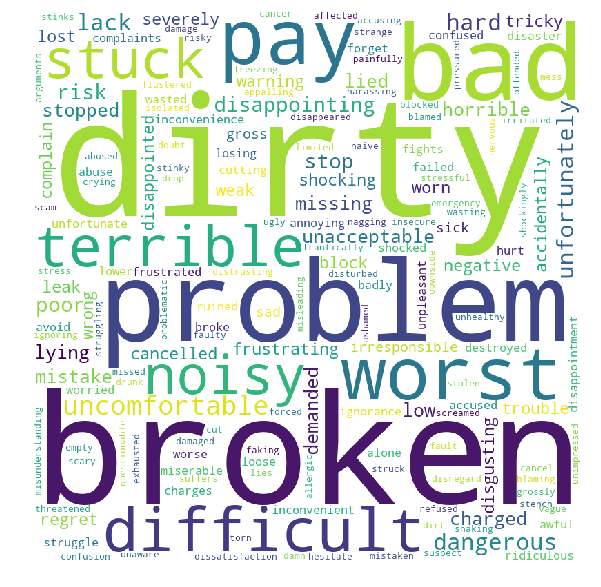

In [28]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(neg_word_list)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 